In [1]:
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
plt.style.use('ggplot')
import pandas as pd
import numpy as np

import seaborn as sns
sns.set()

from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.model_selection import GridSearchCV, cross_val_score

from sklearn.metrics import accuracy_score

from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import learning_curve,validation_curve

In [10]:
# load the data
df = pd.read_csv('./Data/Final_18_features_extracted_V2.csv')

In [11]:
X = df.drop(columns=["Region","File Name"],axis=1)
y = df['Region']

In [12]:
X_train,X_test,y_train,y_test = train_test_split(
    X,y,test_size=0.3,random_state=17,shuffle=True
)

In [7]:
skf = StratifiedKFold(n_splits=5,shuffle=True,random_state=17)
rfc = RandomForestClassifier(random_state=17,n_jobs=-1)

In [8]:
def plot_with_err(x, data, **kwargs):
    mu, std = data.mean(1), data.std(1)
    lines = plt.plot(x, mu, "-", **kwargs)
    plt.fill_between(
        x,
        mu - std,
        mu + std,
        edgecolor="none",
        facecolor=lines[0].get_color(),
        alpha=0.2,
    )

- Number of estimators

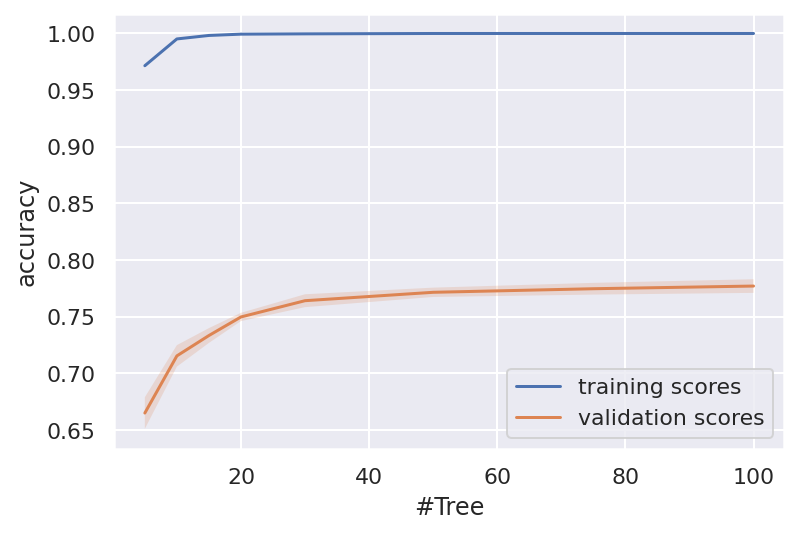

In [15]:
trees_grid = [5, 10, 15, 20, 30, 50, 75, 100]
val_train, val_test = validation_curve(
    estimator=rfc,
    X=X_train,
    y=y_train,
    param_name='n_estimators',
    param_range=trees_grid,
    cv=skf,
    scoring="accuracy"
)

plot_with_err(trees_grid, val_train, label="training scores")
plot_with_err(trees_grid, val_test, label="validation scores")
plt.xlabel("#Tree")
plt.ylabel("accuracy")
plt.legend()
plt.grid(True);

- MAX DEPTH

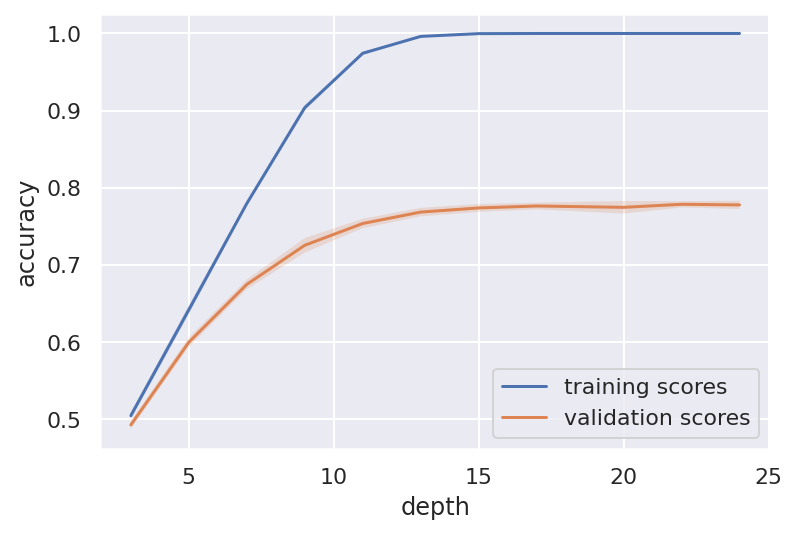

In [16]:
max_depth_grid = [3, 5, 7, 9, 11, 13, 15, 17, 20, 22, 24]
val_train, val_test = validation_curve(
    estimator=rfc,
    X=X_train,
    y=y_train,
    param_name='max_depth',
    param_range=max_depth_grid,
    cv=skf,
    scoring="accuracy"
)

plot_with_err(max_depth_grid, val_train, label="training scores")
plot_with_err(max_depth_grid, val_test, label="validation scores")
plt.xlabel("depth")
plt.ylabel("accuracy")
plt.legend()
plt.grid(True);

- Minimum number of samples per leaf

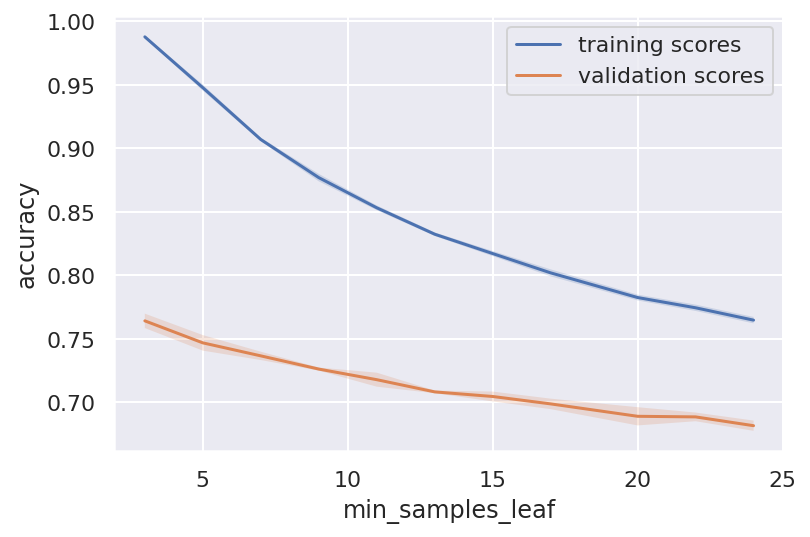

In [17]:
min_samples_leaf_grid = [3, 5, 7, 9, 11, 13, 15, 17, 20, 22, 24]
val_train, val_test = validation_curve(
    estimator=rfc,
    X=X_train,
    y=y_train,
    param_name='min_samples_leaf',
    param_range=min_samples_leaf_grid,
    cv=skf,
    scoring="accuracy"
)

plot_with_err(min_samples_leaf_grid, val_train, label="training scores")
plot_with_err(min_samples_leaf_grid, val_test, label="validation scores")
plt.xlabel("min_samples_leaf")
plt.ylabel("accuracy")
plt.legend()
plt.grid(True);

- Max number of features

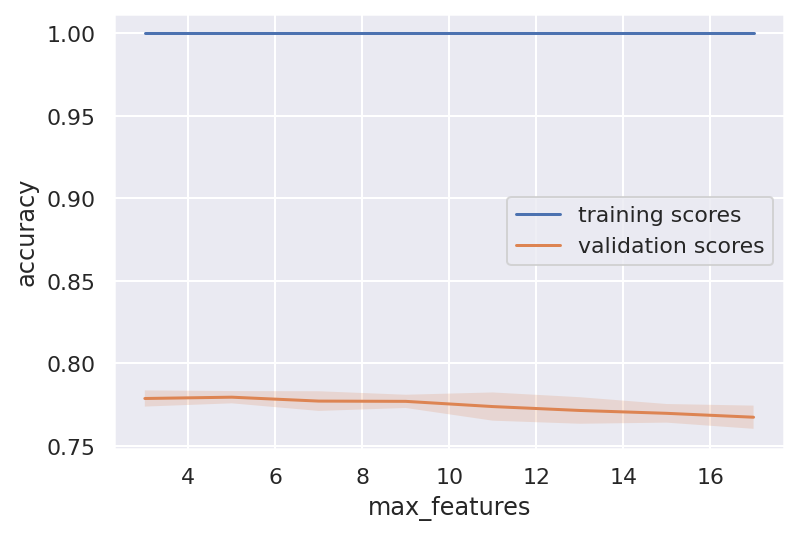

In [18]:
max_features_grid = [3, 5, 7, 9, 11, 13, 15, 17, 20, 22, 24]
val_train, val_test = validation_curve(
    estimator=rfc,
    X=X_train,
    y=y_train,
    param_name='max_features',
    param_range=max_features_grid,
    cv=skf,
    scoring="accuracy"
)

plot_with_err(max_features_grid, val_train, label="training scores")
plot_with_err(max_features_grid, val_test, label="validation scores")
plt.xlabel("max_features")
plt.ylabel("accuracy")
plt.legend()
plt.grid(True);

- Criterion

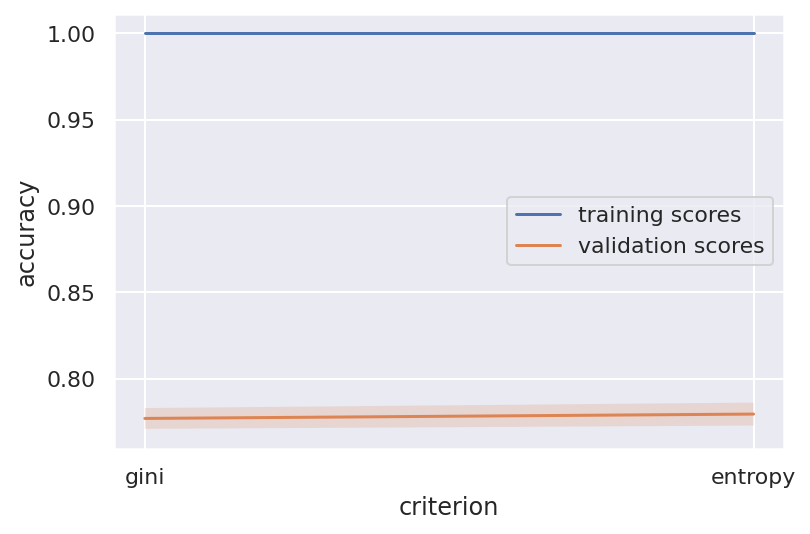

In [19]:
criterion_grid = ['gini','entropy']
val_train, val_test = validation_curve(
    estimator=rfc,
    X=X_train,
    y=y_train,
    param_name='criterion',
    param_range=criterion_grid,
    cv=skf,
    scoring="accuracy"
)

plot_with_err(criterion_grid, val_train, label="training scores")
plot_with_err(criterion_grid, val_test, label="validation scores")
plt.xlabel("criterion")
plt.ylabel("accuracy")
plt.legend()
plt.grid(True);

- Min samples per leaf to split

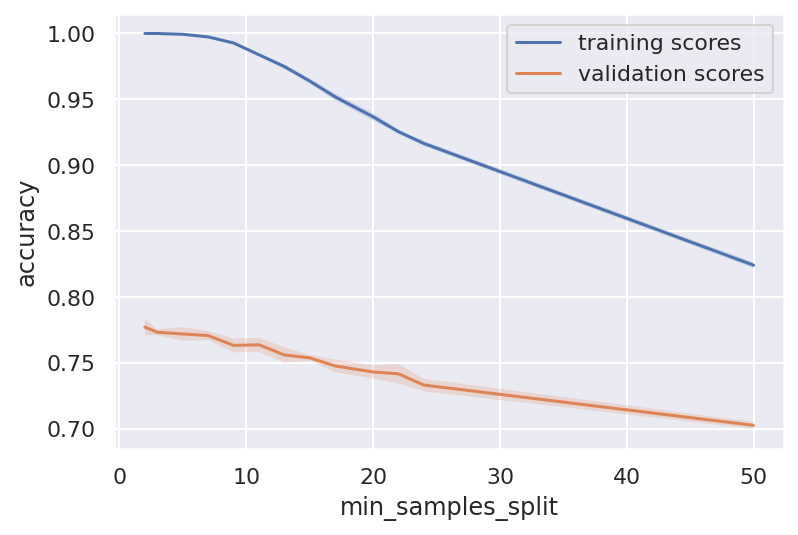

In [21]:
min_samples_split_grid = [2, 3, 5, 7, 9, 11, 13, 15, 17, 20, 22, 24,50]
val_train, val_test = validation_curve(
    estimator=rfc,
    X=X_train,
    y=y_train,
    param_name='min_samples_split',
    param_range=min_samples_split_grid,
    cv=skf,
    scoring="accuracy"
)

plot_with_err(min_samples_split_grid, val_train, label="training scores")
plot_with_err(min_samples_split_grid, val_test, label="validation scores")
plt.xlabel("min_samples_split")
plt.ylabel("accuracy")
plt.legend()
plt.grid(True);